In [1]:
import numpy as np
import matplotlib.pyplot as plt
from regions import Regions
import regions
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u

from smart_plotters.jwst_plots import JWSTCatalog, make_cat_use, make_brick_cat
from smart_plotters.cutout_plot import get_cutout_405, get_cutout_jwst_ice

In [44]:
cat_use = make_cat_use()
cat_use.catalog['Av'] = cat_use.get_Av('f182m', 'f212n')

In [3]:
reg_f = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/filament_short.region')
reg_c1 = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/cloudc1.region')
reg_c2 = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/cloudc2.region')
reg_d = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/cloudd.region')

In [4]:
pos_hmsfr = SkyCoord('17:46:21.4669695284', '-28:35:38.1118497742', unit=(u.hourangle, u.deg))
l = 10*u.arcsec
w = 10*u.arcsec

cutout_hmsfr = get_cutout_405(pos_hmsfr, w, l)

In [5]:
cat_filament = JWSTCatalog(cat_use.table_region_mask(reg_f, cutout_hmsfr.wcs))
cat_c12 = JWSTCatalog(cat_use.table_region_mask([reg_c1[0], reg_c2[0]], cutout_hmsfr.wcs))

(0.0, 3.0)

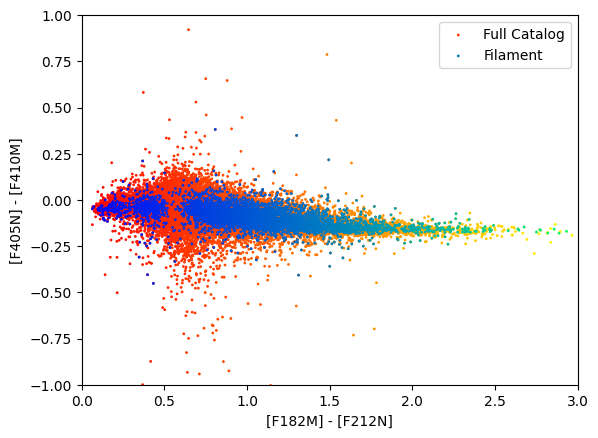

In [6]:
cat_use.plot_CCD('f182m', 'f212n', 'f405n', 'f410m', s=1, cmap='autumn', c=cat_use.color('f182m', 'f212n'), vmin=0, vmax=3, label='Full Catalog')
cat_filament.plot_CCD('f182m', 'f212n', 'f405n', 'f410m', s=1, cmap='winter', c=cat_filament.color('f182m', 'f212n'), vmin=0, vmax=3, label='Filament')
plt.ylim(-1, 1)
plt.legend()
plt.xlim(0, 3)

In [7]:
from dust_extinction.averages import CT06_MWLoc, CT06_MWGC

def plot_extinction_vector(band1, band2, band3, band4, ax=None, ext=CT06_MWLoc(), scale=200, start=(0,0), color='k', head_width=0.1, **kwargs):
    if ax is None:
        ax = plt.gca()
    w1 = int(band1[1:-1])/100*u.um
    w2 = int(band2[1:-1])/100*u.um
    w3 = int(band3[1:-1])/100*u.um
    w4 = int(band4[1:-1])/100*u.um
    e_1 = ext(w1) * scale
    e_2 = ext(w2) * scale
    e_3 = ext(w3) * scale
    e_4 = ext(w4) * scale
    #ax.arrow(start[0], start[1], e_1-e_2, e_3-e_4, color=color, head_width=head_width, label=f'$A_V={scale}$', **kwargs)
    ax.annotate("", xytext=start, xy=(start[0] + e_1 - e_2, start[1] + e_3 - e_4),
                arrowprops=dict(arrowstyle="->", color=color, lw=2, **kwargs),
                label=f'$A_V={scale}$')

# Cloud C

In [65]:
ra = pos_hmsfr.ra - 25 *u.arcsec
dec = pos_hmsfr.dec + 20 *u.arcsec
pos_cloudc = SkyCoord(ra, dec)
l = 100*u.arcsec
w = 120*u.arcsec

cutout_cloudc = get_cutout_405(pos_cloudc, w, l)
cutout_nan = cutout_cloudc.data*np.nan
reg_cloudc = regions.RectangleSkyRegion(center=pos_cloudc, width=l, height=w, angle=0*u.deg)

cat_cloudc = JWSTCatalog(cat_use.table_region_mask([reg_cloudc], cutout_cloudc.wcs))

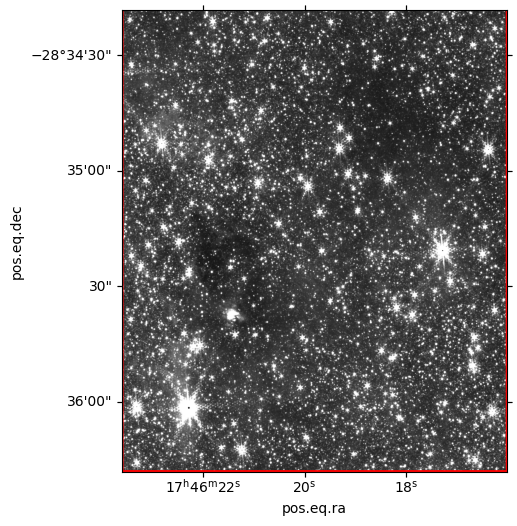

In [9]:
fig = plt.figure(figsize=(10, 6))
ax = plt.subplot(projection=cutout_cloudc.wcs)
im = ax.imshow(cutout_cloudc.data, origin='lower', cmap='gray', vmin=0, vmax=50)
reg_cloudc.to_pixel(cutout_cloudc.wcs).plot(ax=ax, edgecolor='red', facecolor='none', lw=2)

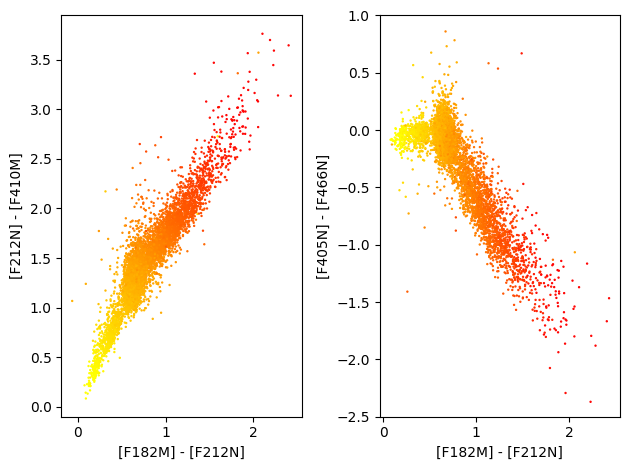

In [10]:
ax = plt.subplot(121)
cat_cloudc.plot_CCD('F182M', 'F212N', 'F212N', 'F410M', c=cat_cloudc.color('f187n', 'f405n'), ax=ax, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)

ax2 = plt.subplot(122)
cat_cloudc.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_cloudc.color('f187n', 'f405n'), ax=ax2, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
ax2.set_ylim(-2.5, 1)

plt.tight_layout()

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/regions/shapes/polygon.py:182: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Polygon(xy=xy, **mpl_kwargs)


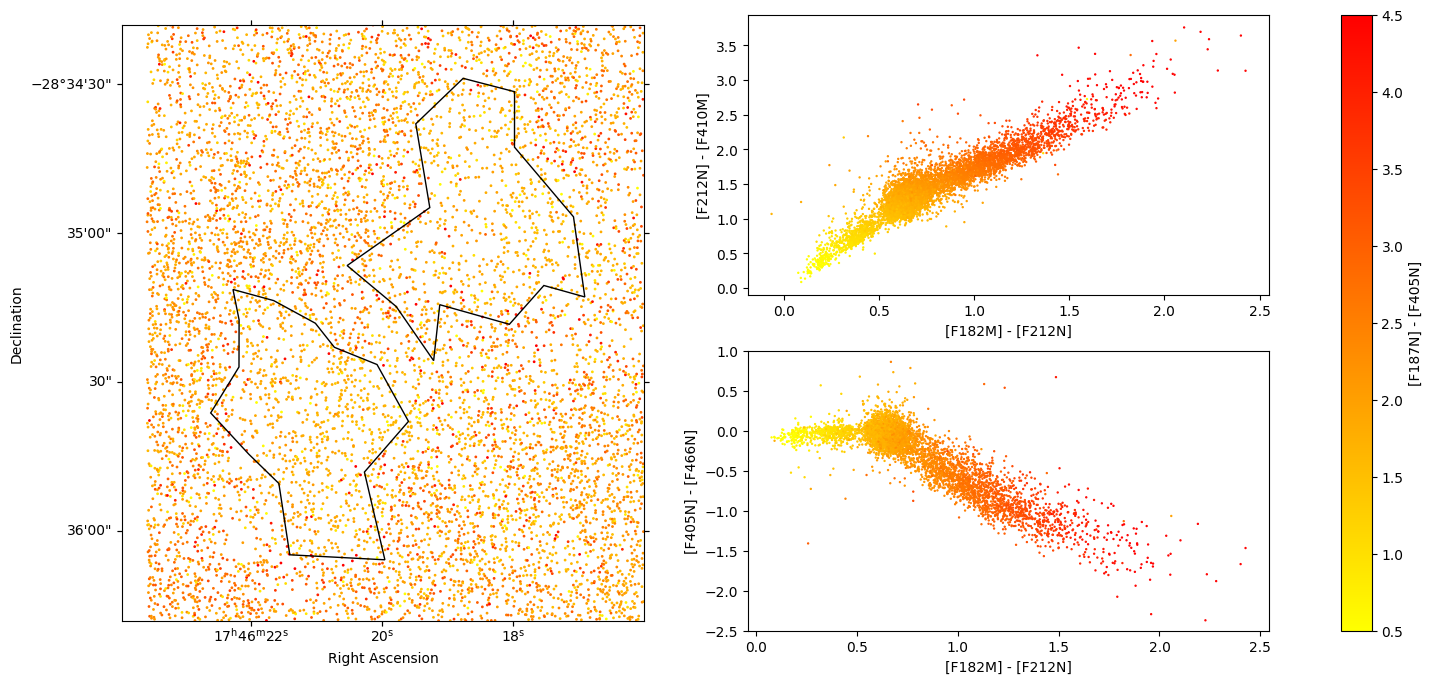

In [11]:
fig = plt.figure(figsize=(18.5, 8))

ax = plt.subplot(121, projection=cutout_cloudc.wcs)
ax.imshow(cutout_nan)
im = ax.scatter(cat_cloudc.catalog['skycoord_ref'].ra, cat_cloudc.catalog['skycoord_ref'].dec, transform=ax.get_transform('world'), s=1, c=cat_cloudc.color('f187n', 'f405n'), cmap='autumn_r', vmin=0.5, vmax=4.5)
reg_c1[0].to_pixel(cutout_cloudc.wcs).plot(color='k', linewidth=1, ax=ax)
reg_c2[0].to_pixel(cutout_cloudc.wcs).plot(color='k', linewidth=1, ax=ax)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

ax2 = plt.subplot(222)
cat_cloudc.plot_CCD('F182M', 'F212N', 'F212N', 'F410M', c=cat_cloudc.color('f187n', 'f405n'), ax=ax2, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)

ax3 = plt.subplot(224)
cat_cloudc.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_cloudc.color('f187n', 'f405n'), ax=ax3, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
ax3.set_ylim(-2.5, 1)

plt.colorbar(im, label='[F187N] - [F405N]', ax=[ax, ax2, ax3])

#plt.tight_layout()

# Cloud D

In [66]:
ra = 266.61798916*u.deg - 85*u.arcsec
dec = -28.56350962*u.deg + 20*u.arcsec
pos_cloudd = SkyCoord(ra, dec, unit='deg')
# 266.61818185263087	-28.563878155421047
ld = 140*u.arcsec
wd = 140*u.arcsec

cutout_cloudd = get_cutout_405(pos_cloudd, wd, ld)
cutout_nan_d = cutout_cloudd.data*np.nan
reg_cloudd = regions.RectangleSkyRegion(center=pos_cloudd, width=ld, height=wd, angle=0*u.deg)

cat_cloudd = JWSTCatalog(cat_use.table_region_mask([reg_cloudd], cutout_cloudd.wcs))

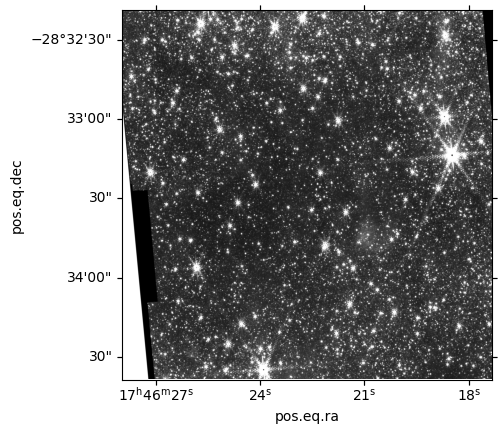

In [13]:
ax = plt.subplot(projection=cutout_cloudd.wcs)
ax.imshow(cutout_cloudd.data, origin='lower', cmap='gray', vmin=0, vmax=50)

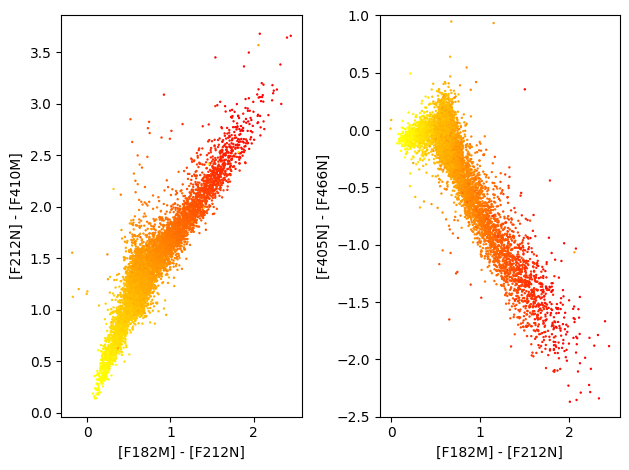

In [14]:
ax = plt.subplot(121)
cat_cloudd.plot_CCD('F182M', 'F212N', 'F212N', 'F410M', c=cat_cloudd.color('f187n', 'f405n'), ax=ax, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)

ax2 = plt.subplot(122)
cat_cloudd.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_cloudd.color('f187n', 'f405n'), ax=ax2, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
ax2.set_ylim(-2.5, 1)

plt.tight_layout()

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/regions/shapes/polygon.py:182: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Polygon(xy=xy, **mpl_kwargs)


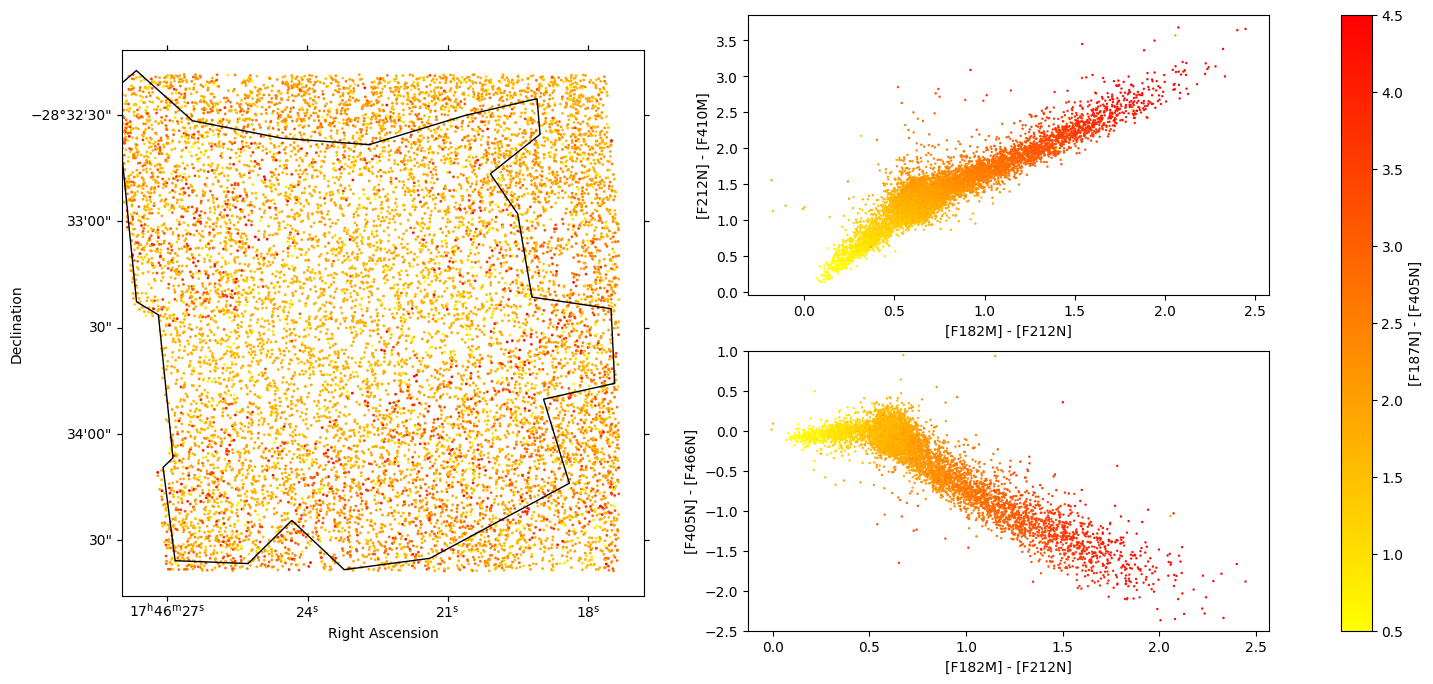

In [15]:
fig = plt.figure(figsize=(18.5, 8))

ax = plt.subplot(121, projection=cutout_cloudd.wcs)
ax.imshow(cutout_nan)
im = ax.scatter(cat_cloudd.catalog['skycoord_ref'].ra, cat_cloudd.catalog['skycoord_ref'].dec, transform=ax.get_transform('world'), s=1, c=cat_cloudd.color('f187n', 'f405n'), cmap='autumn_r', vmin=0.5, vmax=4.5)
reg_d[0].to_pixel(cutout_cloudd.wcs).plot(color='k', linewidth=1, ax=ax)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

ax2 = plt.subplot(222)
cat_cloudd.plot_CCD('F182M', 'F212N', 'F212N', 'F410M', c=cat_cloudd.color('f187n', 'f405n'), ax=ax2, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)

ax3 = plt.subplot(224)
cat_cloudd.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_cloudd.color('f187n', 'f405n'), ax=ax3, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
ax3.set_ylim(-2.5, 1)

plt.colorbar(im, label='[F187N] - [F405N]', ax=[ax, ax2, ax3])

#plt.tight_layout()

# Further than Cloud D

In [45]:
ra = 266.61798916*u.deg - 75*u.arcsec
dec = -28.56350962*u.deg + 120*u.arcsec
pos_far = SkyCoord(ra, dec, unit='deg')
# 266.61818185263087	-28.563878155421047
lf = 140*u.arcsec
wf = 70*u.arcsec

cutout_far = get_cutout_405(pos_far, wf, lf)
cutout_nan_f = cutout_far.data*np.nan
reg_far = regions.RectangleSkyRegion(center=pos_far, width=lf, height=wf, angle=0*u.deg)
cat_far = JWSTCatalog(cat_use.table_region_mask([reg_far], cutout_far.wcs))

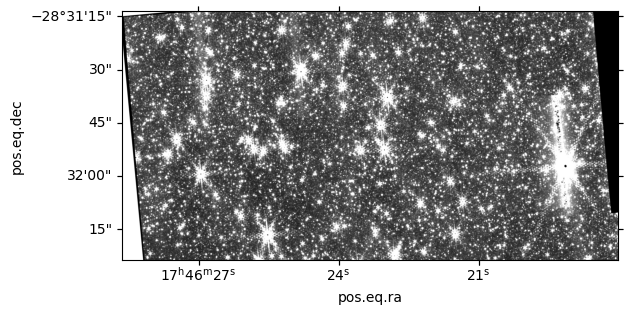

In [46]:
ax = plt.subplot(projection=cutout_far.wcs)
ax.imshow(cutout_far.data, origin='lower', cmap='gray', vmin=0, vmax=50)

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


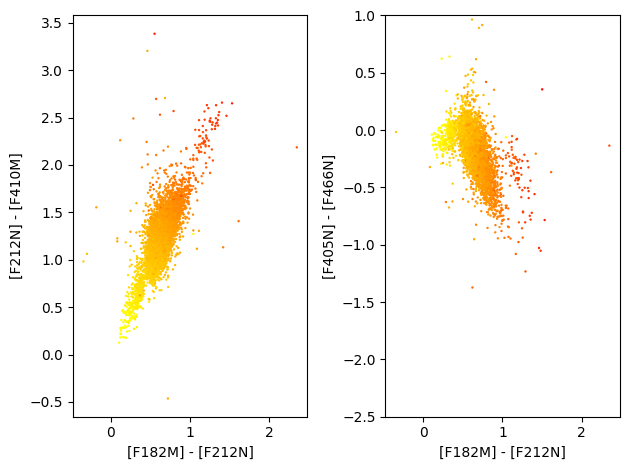

In [47]:
ax = plt.subplot(121)
cat_far.plot_CCD('F182M', 'F212N', 'F212N', 'F410M', c=cat_far.color('f187n', 'f405n'), ax=ax, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)

ax2 = plt.subplot(122)
cat_far.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_far.color('f187n', 'f405n'), ax=ax2, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
ax2.set_ylim(-2.5, 1)

plt.tight_layout()

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


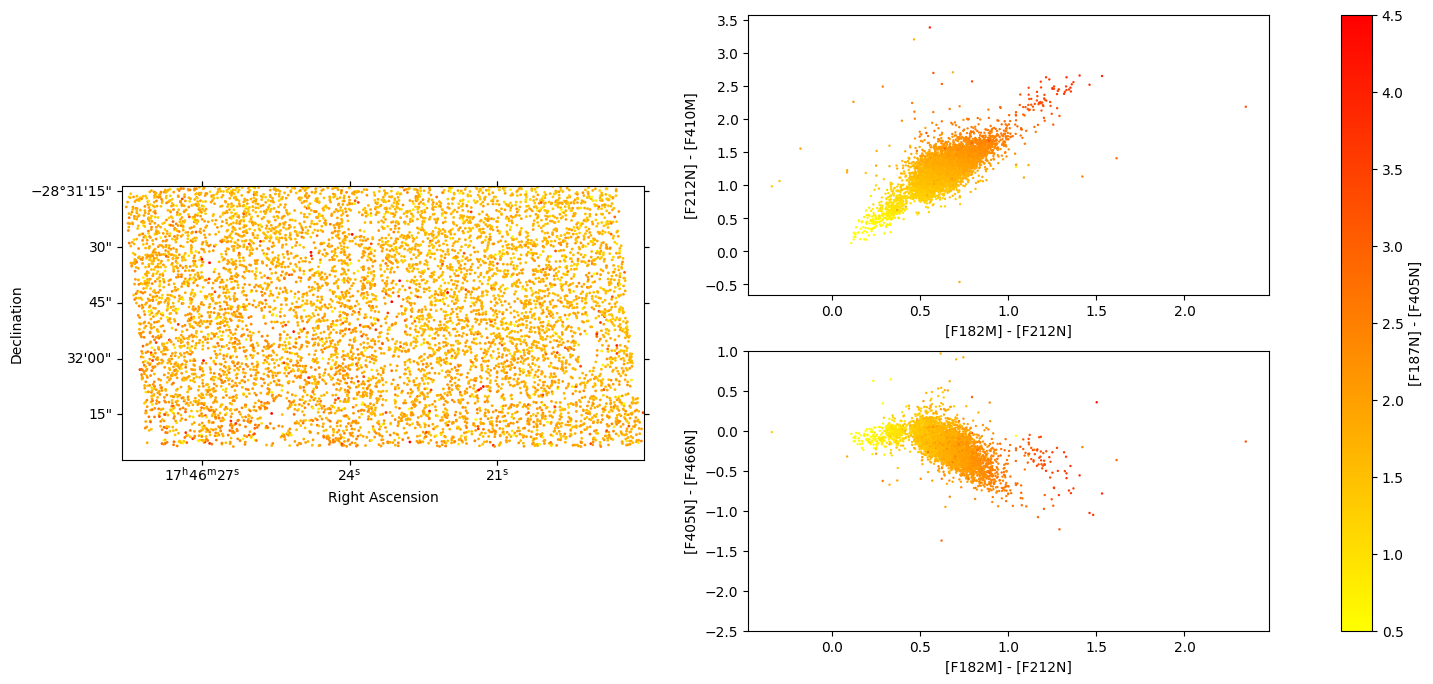

In [48]:
fig = plt.figure(figsize=(18.5, 8))

ax = plt.subplot(121, projection=cutout_far.wcs)
ax.imshow(cutout_nan_f)
im = ax.scatter(cat_far.catalog['skycoord_ref'].ra, cat_far.catalog['skycoord_ref'].dec, transform=ax.get_transform('world'), s=1, c=cat_far.color('f187n', 'f405n'), cmap='autumn_r', vmin=0.5, vmax=4.5)
#reg_d[0].to_pixel(cutout_far.wcs).plot(color='k', linewidth=1, ax=ax)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

ax2 = plt.subplot(222)
cat_far.plot_CCD('F182M', 'F212N', 'F212N', 'F410M', c=cat_far.color('f187n', 'f405n'), ax=ax2, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)

ax3 = plt.subplot(224)
cat_far.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_far.color('f187n', 'f405n'), ax=ax3, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
ax3.set_ylim(-2.5, 1)

plt.colorbar(im, label='[F187N] - [F405N]', ax=[ax, ax2, ax3])

#plt.tight_layout()

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


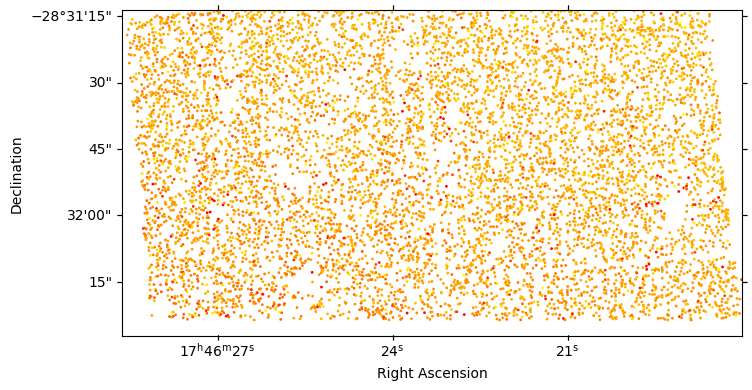

In [49]:
fig = plt.figure(figsize=(8, 8))

ax = plt.subplot(111, projection=cutout_far.wcs)
ax.imshow(cutout_nan_f)
im = ax.scatter(cat_far.catalog['skycoord_ref'].ra, cat_far.catalog['skycoord_ref'].dec, transform=ax.get_transform('world'), s=1, c=cat_far.color('f182m', 'f405n'), cmap='autumn_r', vmin=0.5, vmax=4.5)
#reg_d[0].to_pixel(cutout_far.wcs).plot(color='k', linewidth=1, ax=ax)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

#ax2 = plt.subplot(222)
#cat_far.plot_CCD('F182M', 'F212N', 'F212N', 'F410M', c=cat_far.color('f187n', 'f405n'), ax=ax2, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
#
#ax3 = plt.subplot(224)
#cat_far.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_far.color('f187n', 'f405n'), ax=ax3, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
#ax3.set_ylim(-2.5, 1)
#
#plt.colorbar(im, label='[F187N] - [F405N]', ax=[ax, ax2, ax3])

#plt.tight_layout()

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)
/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


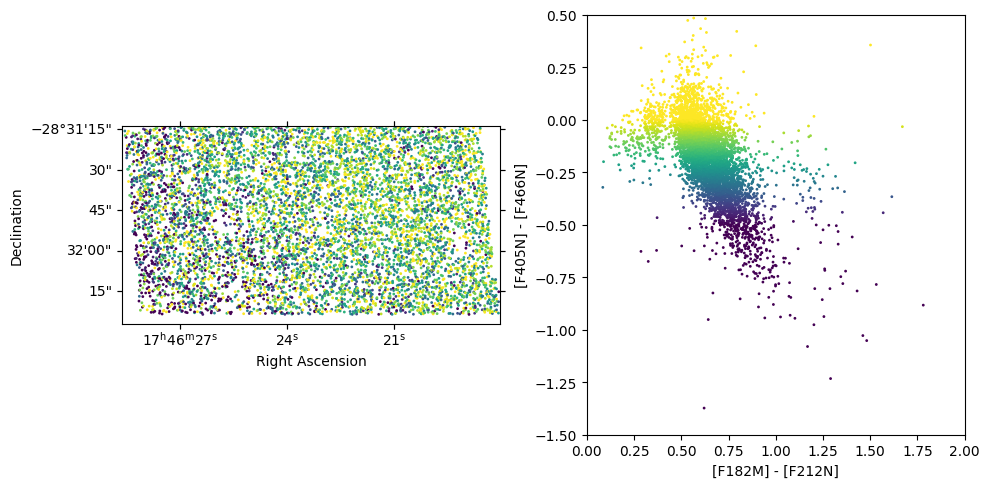

In [50]:
fig = plt.figure(figsize=(10, 5))

ax = plt.subplot(121, projection=cutout_far.wcs)
ax.imshow(cutout_nan_f)
im = ax.scatter(cat_far.catalog['skycoord_ref'].ra, cat_far.catalog['skycoord_ref'].dec, transform=ax.get_transform('world'), s=1, c=cat_far.color('f405n', 'f466n'), cmap='viridis', vmin=-0.5, vmax=0)
#reg_d[0].to_pixel(cutout_far.wcs).plot(color='k', linewidth=1, ax=ax)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

ax = plt.subplot(122)
#cat_use.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', ax=ax, s=1, color='k', alpha=0.1)
cat_far.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_far.color('f405n', 'f466n'), ax=ax, s=1, cmap='viridis', vmin=-0.5, vmax=0)
ax.set_ylim(-1.5, 0.5)
ax.set_xlim(0, 2)
plt.tight_layout()

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


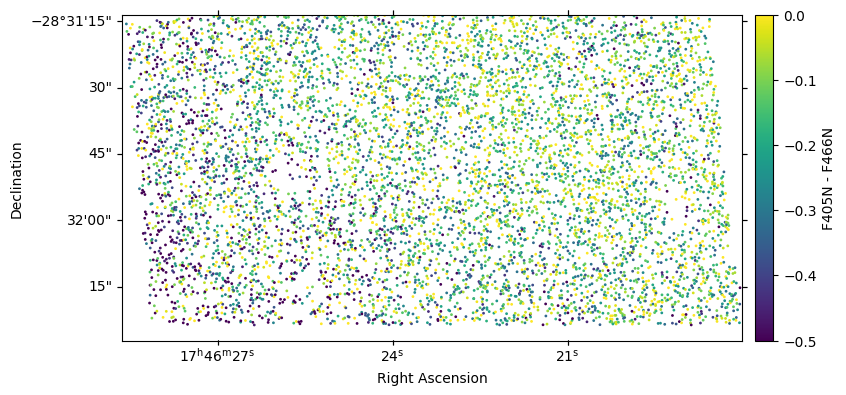

In [51]:
fig = plt.figure(figsize=(8, 8))

ax = plt.subplot(111, projection=cutout_far.wcs)
ax.imshow(cutout_nan_f)
im = ax.scatter(cat_far.catalog['skycoord_ref'].ra, cat_far.catalog['skycoord_ref'].dec, transform=ax.get_transform('world'), s=1, c=cat_far.color('f405n', 'f466n'), cmap='viridis', vmin=-0.5, vmax=0)
#reg_d[0].to_pixel(cutout_far.wcs).plot(color='k', linewidth=1, ax=ax)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
cax = ax.inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='F405N - F466N', cax=cax)

#ax = plt.subplot(122)
##cat_use.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', ax=ax, s=1, color='k', alpha=0.1)
#cat_far.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_far.color('f405n', 'f466n'), ax=ax, s=1, cmap='viridis', vmin=-0.5, vmax=0)
#ax.set_ylim(-1.5, 0.5)
#ax.set_xlim(0, 2)
#plt.tight_layout()

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


(-1.5, 0.5)

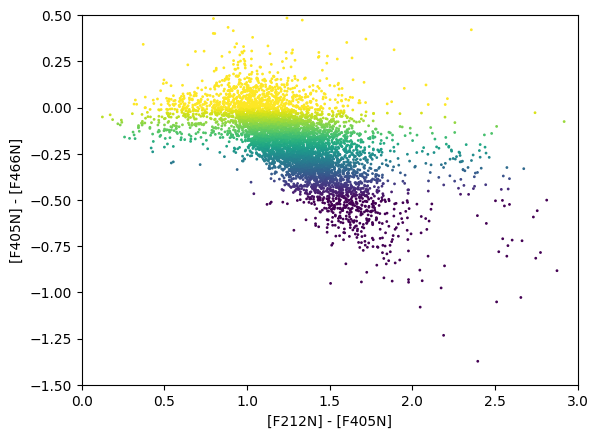

In [52]:
ax = plt.subplot(111)
cat_far.plot_CCD('F212N', 'F405N', 'F405N', 'F466N', c=cat_far.color('f405n', 'f466n'), ax=ax, s=1, cmap='viridis', vmin=-0.5, vmax=0)
ax.set_xlim(0, 3)
ax.set_ylim(-1.5, 0.5)

<Axes: xlabel='[F212N] - [F405N]', ylabel='[F405N] - [F466N]'>

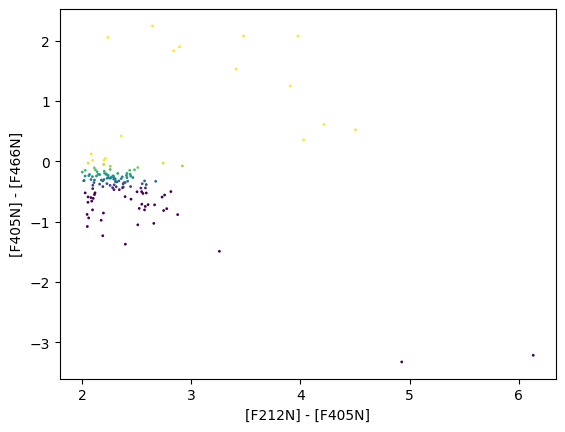

In [53]:
cat_far_red = JWSTCatalog(cat_far.catalog[cat_far.color('f212n', 'f405n') > 2])

ax = plt.subplot(111)
cat_far_red.plot_CCD('F212N', 'F405N', 'F405N', 'F466N', c=cat_far_red.color('f405n', 'f466n'), ax=ax, s=1, cmap='viridis', vmin=-0.5, vmax=0)

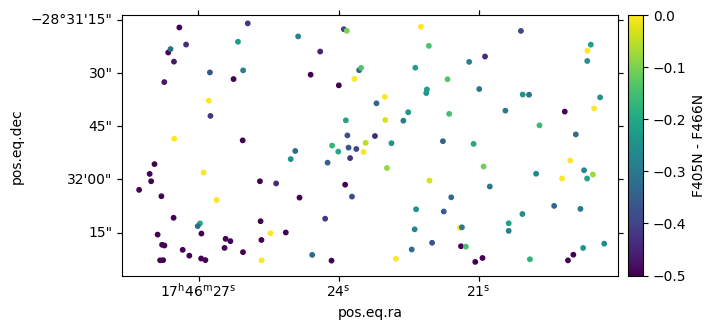

In [54]:
ax = plt.subplot(111, projection=cutout_far.wcs)
ax.imshow(cutout_nan_f)
im = ax.scatter(cat_far_red.catalog['skycoord_ref'].ra, cat_far_red.catalog['skycoord_ref'].dec, transform=ax.get_transform('world'), s=10, c=cat_far_red.color('f405n', 'f466n'), cmap='viridis', vmin=-0.5, vmax=0)
cax = ax.inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='F405N - F466N', cax=cax)

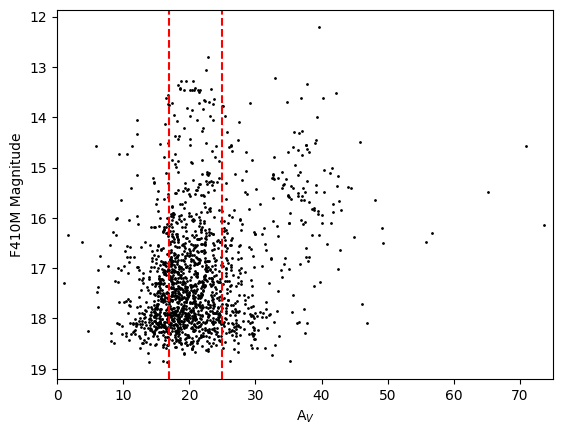

In [63]:
plt.scatter(cat_far_red.catalog['Av'], cat_far_red.band('f410m'), s=1, color='k')
plt.gca().invert_yaxis()
plt.xlim(0, 75)
plt.xlabel('A$_V$')
plt.ylabel('F410M Magnitude')
plt.axvline(25, color='r', linestyle='--')
plt.axvline(17, color='r', linestyle='--')

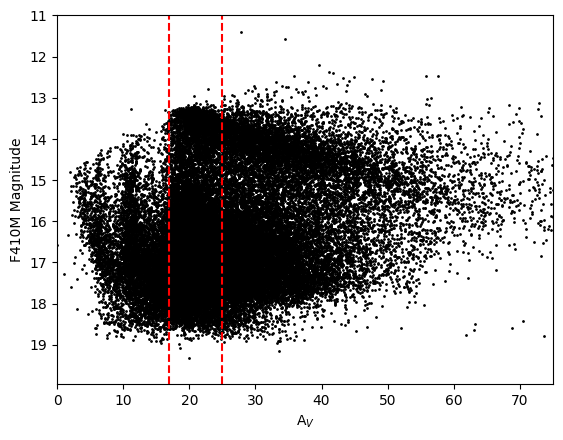

In [67]:
plt.scatter(cat_use.catalog['Av'], cat_use.band('f410m'), s=1, color='k')
plt.gca().invert_yaxis()
plt.xlim(0, 75)
plt.xlabel('A$_V$')
plt.ylabel('F410M Magnitude')
plt.axvline(25, color='r', linestyle='--')
plt.axvline(17, color='r', linestyle='--')


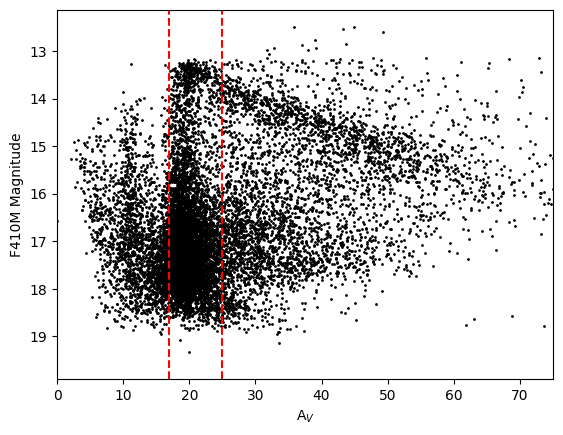

In [68]:
plt.scatter(cat_cloudd.catalog['Av'], cat_cloudd.band('f410m'), s=1, color='k')
plt.gca().invert_yaxis()
plt.xlim(0, 75)
plt.xlabel('A$_V$')
plt.ylabel('F410M Magnitude')
plt.axvline(25, color='r', linestyle='--')
plt.axvline(17, color='r', linestyle='--')


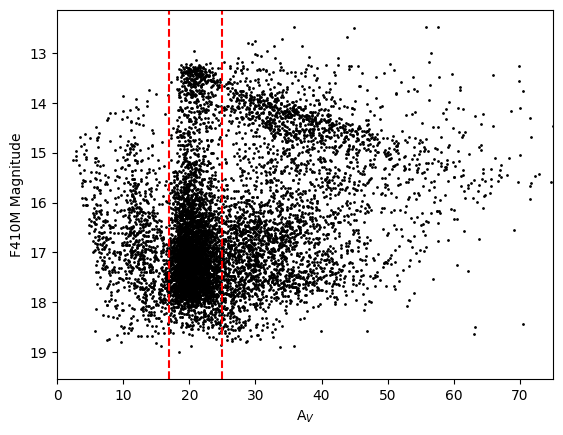

In [69]:
plt.scatter(cat_cloudc.catalog['Av'], cat_cloudc.band('f410m'), s=1, color='k')
plt.gca().invert_yaxis()
plt.xlim(0, 75)
plt.xlabel('A$_V$')
plt.ylabel('F410M Magnitude')
plt.axvline(25, color='r', linestyle='--')
plt.axvline(17, color='r', linestyle='--')


# Both Clouds C and D

In [21]:
ra = 266.61798916*u.deg - 100*u.arcsec
dec = -28.56350962*u.deg - 25*u.arcsec
pos_dustridge = SkyCoord(ra, dec, unit='deg')
l = 160*u.arcsec
w = 250*u.arcsec

cutout_dustridge = get_cutout_405(pos_dustridge, w, l)
cutout_nan_dustridge = cutout_dustridge.data*np.nan
reg_dustridge = regions.RectangleSkyRegion(center=pos_dustridge, width=l, height=w, angle=0*u.deg)
cat_dustridge = JWSTCatalog(cat_use.table_region_mask([reg_dustridge], cutout_dustridge.wcs))

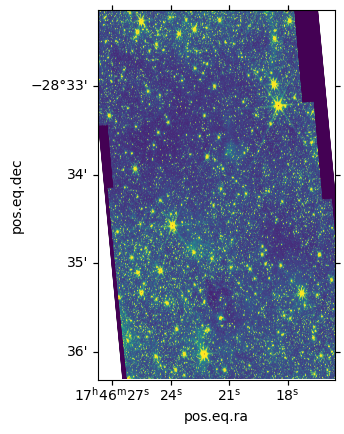

In [22]:
ax = plt.subplot(projection=cutout_dustridge.wcs)
ax.imshow(cutout_dustridge.data, vmin=0, vmax=50)

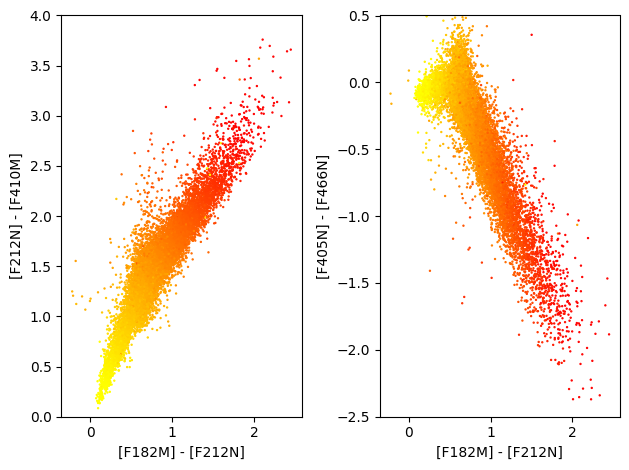

In [23]:
ax = plt.subplot(121)
cat_dustridge.plot_CCD('F182M', 'F212N', 'F212N', 'F410M', c=cat_dustridge.color('f187n', 'f405n'), ax=ax, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
ax.set_ylim(0, 4)

ax = plt.subplot(122)
cat_dustridge.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_dustridge.color('f187n', 'f405n'), ax=ax, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
ax.set_ylim(-2.5, 0.5)

plt.tight_layout()

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/regions/shapes/polygon.py:182: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Polygon(xy=xy, **mpl_kwargs)


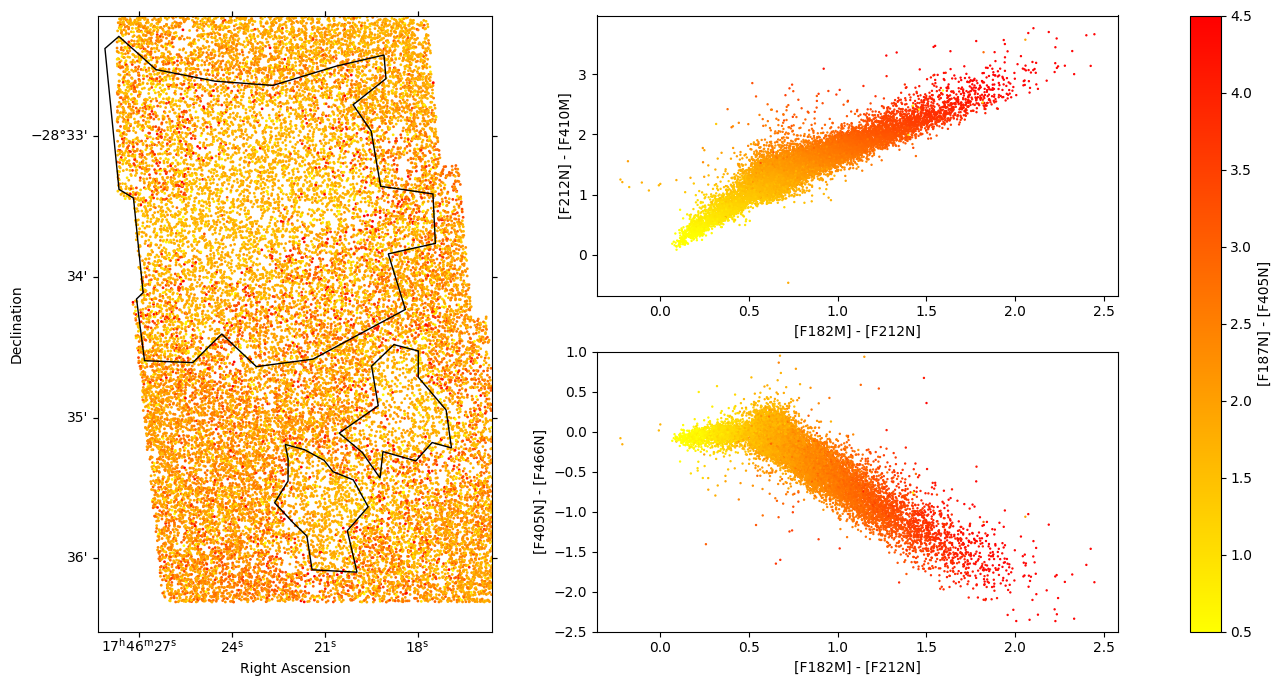

In [24]:
fig = plt.figure(figsize=(18.5, 8))

ax = plt.subplot(121, projection=cutout_dustridge.wcs)
ax.imshow(cutout_nan_dustridge)
im = ax.scatter(cat_dustridge.catalog['skycoord_ref'].ra, cat_dustridge.catalog['skycoord_ref'].dec, transform=ax.get_transform('world'), s=1, c=cat_dustridge.color('f187n', 'f405n'), cmap='autumn_r', vmin=0.5, vmax=4.5)
#reg_dustridge.to_pixel(cutout_dustridge.wcs).plot(color='k', linewidth=1, ax=ax)
reg_c1[0].to_pixel(cutout_dustridge.wcs).plot(color='k', linewidth=1, ax=ax)
reg_c2[0].to_pixel(cutout_dustridge.wcs).plot(color='k', linewidth=1, ax=ax)
reg_d[0].to_pixel(cutout_dustridge.wcs).plot(color='k', linewidth=1, ax=ax)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

ax2 = plt.subplot(222)
cat_dustridge.plot_CCD('F182M', 'F212N', 'F212N', 'F410M', c=cat_dustridge.color('f187n', 'f405n'), ax=ax2, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)

ax3 = plt.subplot(224)
cat_dustridge.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_dustridge.color('f187n', 'f405n'), ax=ax3, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
ax3.set_ylim(-2.5, 1)

plt.colorbar(im, label='[F187N] - [F405N]', ax=[ax, ax2, ax3])

#plt.tight_layout()

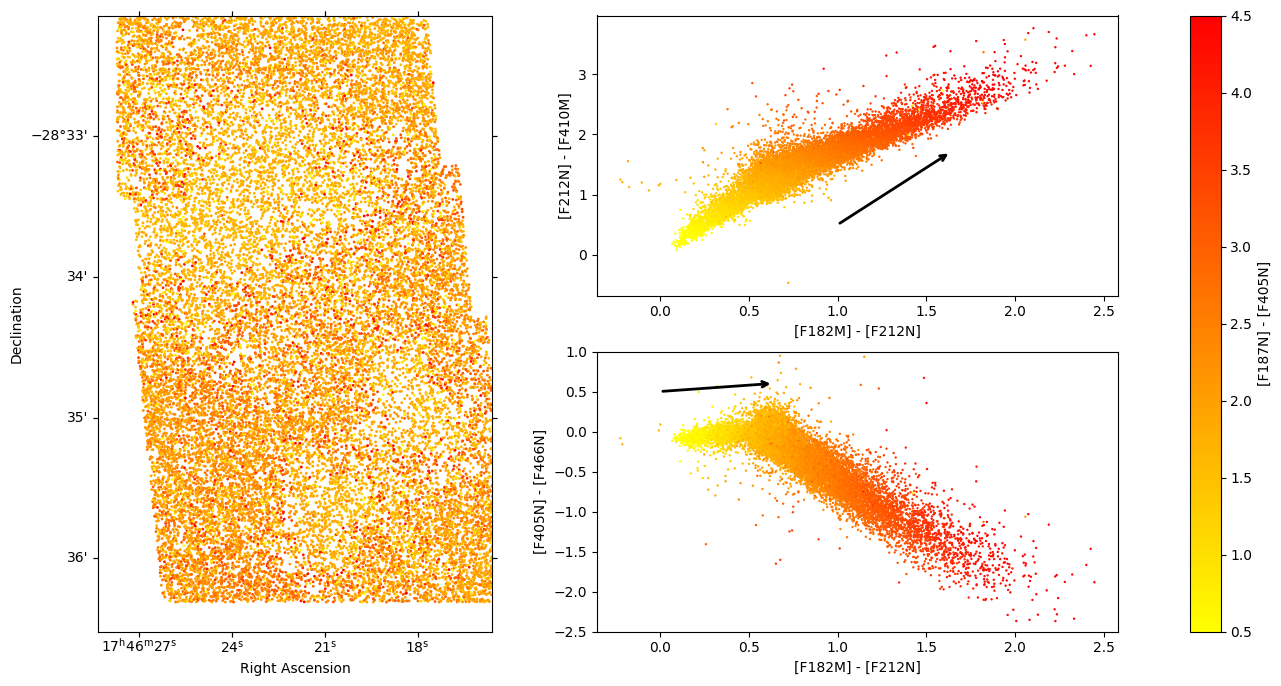

In [25]:
fig = plt.figure(figsize=(18.5, 8))

ax = plt.subplot(121, projection=cutout_dustridge.wcs)
ax.imshow(cutout_nan_dustridge)
im = ax.scatter(cat_dustridge.catalog['skycoord_ref'].ra, cat_dustridge.catalog['skycoord_ref'].dec, transform=ax.get_transform('world'), s=1, c=cat_dustridge.color('f187n', 'f405n'), cmap='autumn_r', vmin=0.5, vmax=4.5)
#reg_dustridge.to_pixel(cutout_dustridge.wcs).plot(color='k', linewidth=1, ax=ax)
#reg_c1[0].to_pixel(cutout_dustridge.wcs).plot(color='k', linewidth=1, ax=ax)
#reg_c2[0].to_pixel(cutout_dustridge.wcs).plot(color='k', linewidth=1, ax=ax)
#reg_d[0].to_pixel(cutout_dustridge.wcs).plot(color='k', linewidth=1, ax=ax)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

ax2 = plt.subplot(222)
cat_dustridge.plot_CCD('F182M', 'F212N', 'F212N', 'F410M', c=cat_dustridge.color('f187n', 'f405n'), ax=ax2, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
plot_extinction_vector('F182M', 'F212N', 'F212N', 'F410M', ax=ax2, color='k', scale=20, start=(1, 0.5), head_width=0.1, ext=CT06_MWGC())

ax3 = plt.subplot(224)
cat_dustridge.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_dustridge.color('f187n', 'f405n'), ax=ax3, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5)
plot_extinction_vector('F182M', 'F212N', 'F405N', 'F466N', ax=ax3, color='k', scale=20, start=(0, 0.5), head_width=0.1, ext=CT06_MWGC())
ax3.set_ylim(-2.5, 1)

plt.colorbar(im, label='[F187N] - [F405N]', ax=[ax, ax2, ax3])

#plt.tight_layout()

/scratch/local/17883900/ipykernel_2160024/888364262.py:5: UserWarning: Legend does not support handles for Annotation instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


(0.0, 4.0)

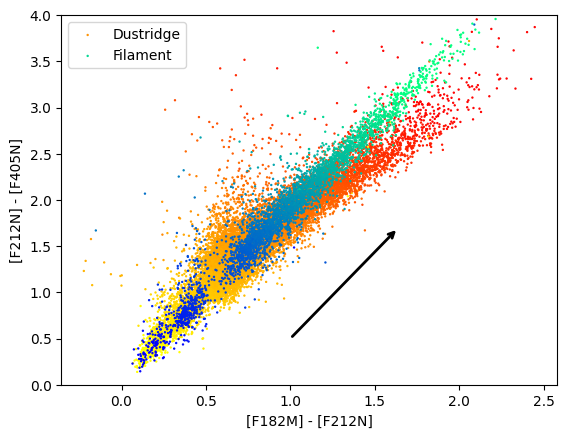

In [26]:
ax = plt.subplot()
cat_dustridge.plot_CCD('F182M', 'F212N', 'F212N', 'F405N', c=cat_dustridge.color('f187n', 'f405n'), ax=ax, s=0.5, cmap='autumn_r', vmin=0.5, vmax=4.5, label='Dustridge')
cat_filament.plot_CCD('F182M', 'F212N', 'F212N', 'F405N', c=cat_filament.color('f187n', 'f405n'), ax=ax, s=0.5, cmap='winter', vmin=0.5, vmax=4.5, label='Filament')
plot_extinction_vector('F182M', 'F212N', 'F212N', 'F405N', ax=ax, color='k', scale=20, start=(1, 0.5), head_width=0.1, ext=CT06_MWGC())
plt.legend()

ax.set_ylim(0, 4)

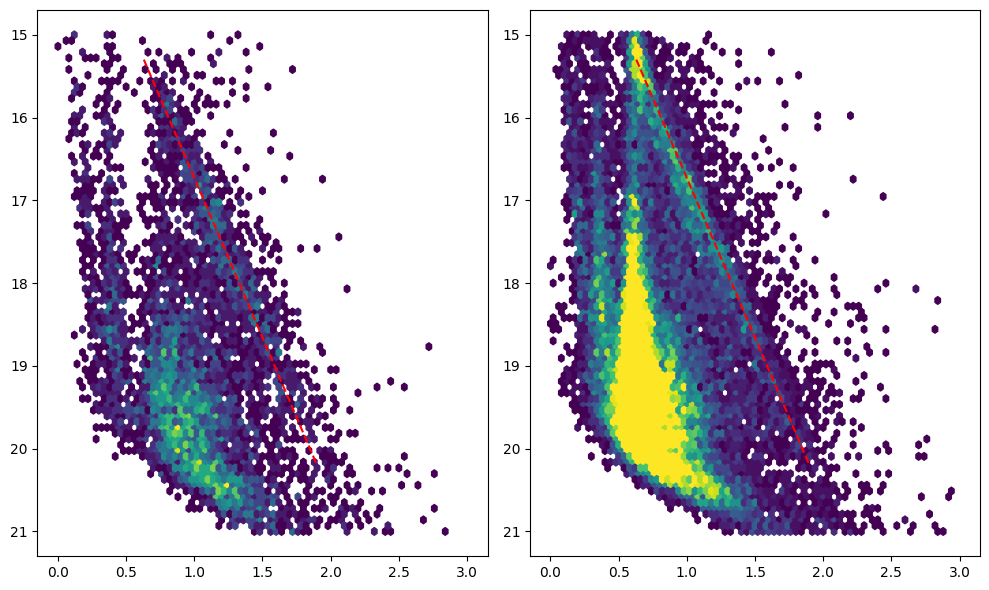

In [27]:
fig = plt.figure(figsize=(10, 6))
ax = plt.subplot(121)
#cat_filament.plot_CMD('f182m', 'f212n', 'f182m', s=1, cmap='winter', c=cat_filament.color('f182m', 'f212n'), ax=ax)
#ax.set_xlim(0, 3)
ax.hexbin(cat_filament.color('f182m', 'f212n'), cat_filament.band('f182m'), gridsize=75, cmap='viridis', mincnt=1, extent=(0, 3, 15, 21))
ax.plot([0.63, 1.9], [15.3, 20.2], color='r', linestyle='--', label='RC')

plt.gca().invert_yaxis()

ax = plt.subplot(122)
ax.hexbin(cat_dustridge.color('f182m', 'f212n'), cat_dustridge.band('f182m'), gridsize=75, cmap='viridis', mincnt=1, extent=(0, 3, 15, 21), vmax=25)
ax.plot([0.63, 1.9], [15.3, 20.2], color='r', linestyle='--', label='RC')

plt.gca().invert_yaxis()

plt.tight_layout()